In [22]:
using Revise
using SSM
using Distributions
using ForwardDiff
using LinearAlgebra
using Random
using StatsFuns
using SpecialFunctions
using Test

include("../../helper_functions.jl")
include("../HiddenMarkovModels.jl")

test_HiddenMarkovModel_E_step (generic function with 1 method)

## Create a Simulation

In [23]:
# create a Gaussian true_model
Random.seed!(123)

input_dim = 2
output_dim = 2
n = 1000

μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = Gaussian(output_dim=output_dim, μ=μ, Σ=Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

μ = [-1.0, 2.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

# make the true_model
true_model = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])
true_model.πₖ = [1.0, 0, 0]
true_model.A = [0.7 0.2 0.1; 0.2 0.7 0.1; 0.2 0.1 0.7]

# generate some data
state_sequence, Y = SSM.sample(true_model, n=n)

([1, 1, 1, 1, 1, 1, 3, 3, 3, 2  …  2, 2, 2, 2, 2, 2, 2, 1, 1, 1], [0.15566175378128327 0.31021305449563696; 0.4898761966905546 -0.42425409311204704; … ; 0.011235074819786015 0.23175219805974967; -0.3120496900775044 0.3505403467279888])

## Fit a model

In [24]:
est_model = HiddenMarkovModel(K=3, emission=Gaussian(output_dim=output_dim))
weighted_initialization(est_model, Y)
fit!(est_model, Y)

iter 1 loglikelihood: -2900.857036526132
iter 2 loglikelihood: -2899.9540665754625
iter 3 loglikelihood: -2897.7006954402827
iter 4 loglikelihood: -2890.739106514851
iter 5 loglikelihood: -2865.558794002175
iter 6 loglikelihood: -2756.4932226513174
iter 7 loglikelihood: -2443.3296159199544
iter 8 loglikelihood: -2211.6251817158613
iter 9 loglikelihood: -2017.1258340808486
iter 10 loglikelihood: -1912.5991139072478
iter 11 loglikelihood: -1888.5367786636243
iter 12 loglikelihood: -1882.8931133827932
iter 13 loglikelihood: -1876.7415767610769
iter 14 loglikelihood: -1867.8379504789084
iter 15 loglikelihood: -1852.4069483886192
iter 16 loglikelihood: -1814.2809143476156
iter 17 loglikelihood: -1714.254335089782
iter 18 loglikelihood: -1600.4381831190221
iter 19 loglikelihood: -1534.923899741312
iter 20 loglikelihood: -1467.3784437192057
iter 21 loglikelihood: -1382.8147688238853
iter 22 loglikelihood: -1345.7777103463475
iter 23 loglikelihood: -1343.7702991470026
iter 24 loglikelihood: -1

## Check results

In [25]:
print_models(true_model, est_model, Y)


True Model:
true_model: HiddenMarkovModel([0.7 0.2 0.1; 0.2 0.7 0.1; 0.2 0.1 0.7], EmissionModel[GaussianEmission(Gaussian(2, [0.0, 0.0], [0.1 0.0; 0.0 0.1])), GaussianEmission(Gaussian(2, [2.0, 1.0], [0.1 0.0; 0.0 0.1])), GaussianEmission(Gaussian(2, [-1.0, 2.0], [0.1 0.0; 0.0 0.1]))], [1.0, 0.0, 0.0], 3)
loglikelihood: -1349.1320153941967

Estimated Model:
est_model: HiddenMarkovModel([0.6806777799520586 0.1217564451208345 0.1975657749271018; 0.08416210453735305 0.7193140523477332 0.1965238431149089; 0.21518443823965638 0.09643861006134374 0.6883769516989939], EmissionModel[GaussianEmission(Gaussian(2, [2.0083844004831306, 1.0082417489238262], [0.10428381018227563 0.0049249613241937286; 0.0049249613241937286 0.09708104349755639])), GaussianEmission(Gaussian(2, [-1.0003064012568292, 1.9895658657545585], [0.09815661952932968 -0.010072922772406921; -0.010072922772406921 0.10612707041394502])), GaussianEmission(Gaussian(2, [-0.00486157894530599, -0.00961887230906172], [0.1063955308662179

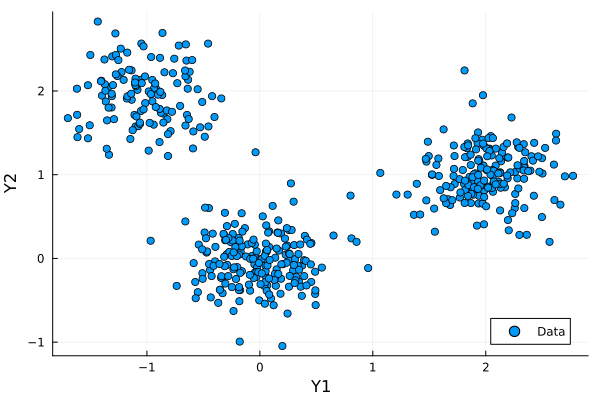

In [26]:
# plot the data
using Plots
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

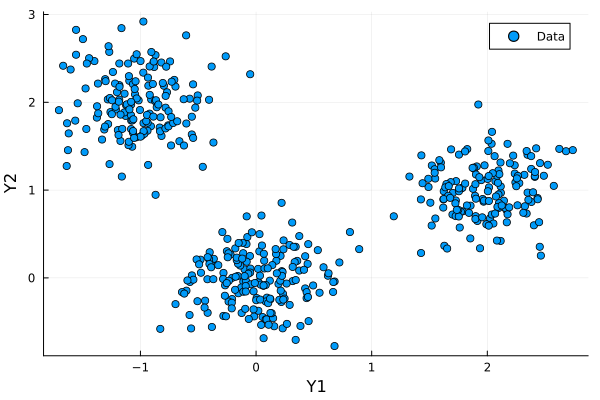

In [27]:
# sample from the est_model and plot the data

state_sequence, Y = SSM.sample(est_model, n=n)

# plot the data
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")